In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

중간고사 이후 
## 함수를 구현하는 방법
Y = ax+b 입력과 출력이 하나인 경우 이 함수를 확장 시켜서 입출력 값을 여러 개 만듦. 

Y=f(x) 함수의 기본 tool 입력한 값이 변형되어 출력 값이 나옴.

x에는 어떤 식이든지 들어갈 수 있다는 게 중요함 ex. A1/x+b 또는 ax^2+b 이 경우에도 입력값과 출력값은 하나다.

ax+b를 그림으로 그리는 게 중요하다. Y=a1x1+a2x2+a3x3+a4 라면 입력이 세 개, 출력이 한 개

x =(a)> y x가 a만큼 곱해져서 y가 된다

1=(b)> y 1이 b만큼 곱해져서 더한다. (y절편 때문에)

출력이 여러 개일 경우, y1아래에 y2를 쌓는다. 

뉴럴네트워크 텐서플로우 dense라는 말은? X와 y의 관계 사이에 선을 빽빽하게 그어주는 것. 

Typical한 neural net은 fully connected = dense

dense아닐 경우에, cnn 몰라도 됨.

Fully connected 안된 건 그냥 a parameter 값이 0이라고 생각해도 됨.

데이터가 있고, pair wise로 데이터가 수없이 존재할 때 가장 좋은 한 세트만 찾으면 된다. 

X와 y 사이에 또 다른 동그라미(node)를 그린다. 중간에 계산되어지는 값.

구해지는 것은 x와 빈 동그라미 사이의 행렬 그리고 빈 동그라미와 y 의 행렬

4x2 2x2 행렬이 구해짐. 숫자가 총 12개 

Connection은 edge라고 함. 모든 그래프는 node와 edge로 이루어진다. 

X와 y는 layer라고 한다. 인접하지 않은 레이어들끼리는 edge가 있을 수 없다. 

edge에는 방향성이 들어간다. 방향성을 가진 node의 화살표는 weight, parameter라고 부름

가중치가 너무 낮아서 선으로도 안그리는 거 weight가 0이다. 총 몇 개의 weight가 있는지 구할 수 있다. 

출력이라고 해도 되지만, 출력은 함수에서 계산되어 나온 계산값. Target은 정답값(데이터 속에 들어가있는 아웃풋 쪽에 들어가있는 페어 데이터) 

weight matrix가 남을 때, 이 네트워크가 예측할 것을 기대하면서 입력 값을 넣는다. 그럼 출력값이 나오는데, 데이터 속에 있는 target값과 일치하는 지 대조한다. 아웃풋과 타겟값은 위치는 똑같지만 목적이다르다. 데이터 속에서의 샘플을 뽑았을 때, 당연히 입력과 타겟값을 가지고 있다. 그 입력값을 넣어서 계산하면 출력값이 나온다. 그 출력값은 타겟값과는 차이가 있겠다. 훈련이 잘 될수록 타겟값과 일치도가 높다. 좋은 weight matrix가 구해져야 차이가 준다. 그 차이가 error

에러가 적어야 predict를 잘하는 것. 좋은 데이터를 써야지 에러가 적다. 데이터가 많아야한다. (빅데이터) 그리고 훈련을 많이 시켜야한다. 그래프를 잘만들어야한다. 

Hidden layer가 중간에 들어가는 레이어 (입출력 사이에 숨어있다)

Hidden layer와 node의 개수가 전체 함수의 complecity를 결정한다

레이어의 개수가 많아지면 deep 하다고해서 딥러닝이 나옴

Linear? X와 y의 관계가 linear? xy축으로 선으로 나타내지면 linear 

선형성에 비선형성을 부여하는 것 sigmoid 어떤 입력이 들어오더라도, 1,0사이로 축소시켜라

지난시간까지는 숫자가 들어가서, 숫자로 예측되는 것. 지금부터는 입력은 숫잔데 출력은 숫자가 아니게 나온다. (음성인식-숫자가 들어왔는데 텍스트로 나온다) continuous한 값이 들어와도 출력을 예측해야하는 경우. Ex. 영화평점 입력값으로 많은 words들이 들어오더라도, good/bad만 결정하면 되는 것. Continuous 한 값을 categorical 하게 바꿔주는 것도 비선형성

비선형성이 중요한 이유는 많은 기계학습들이 단순 숫자값->숫자값이 아니라 continuous 한 것을 인식해서 categorical 하게 바꾸는 것. 비선형성을 부여하지 않으면 잘 작동하지 않는다. 

많은 인공지능은 continuous한 값-> categorical 하게 패턴인식하는 과정.

어떻게 비선형성을 부여하는가? Y=ax+b 에다가 sigmoid 를 붙여버림.

In [22]:
# Training Data
data = pd.read_csv('regression.csv', delimiter = ',')
X = data['X'].tolist()
Y = data['Y'].tolist()
x_train = np.asarray(X)
y_train = np.asarray(Y)

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])    
])
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mse']) 

In [42]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 6ms/sample - loss: 62.4640 - mean_squared_error: 62.4640
Epoch 2/100
17/17 [==============================] - 0s 69us/sample - loss: 58.7409 - mean_squared_error: 58.7409
Epoch 3/100
17/17 [==============================] - 0s 110us/sample - loss: 56.1506 - mean_squared_error: 56.1506
Epoch 4/100
17/17 [==============================] - 0s 111us/sample - loss: 54.0464 - mean_squared_error: 54.0464
Epoch 5/100
17/17 [==============================] - 0s 184us/sample - loss: 52.2253 - mean_squared_error: 52.2253
Epoch 6/100
17/17 [==============================] - 0s 125us/sample - loss: 50.5937 - mean_squared_error: 50.5937
Epoch 7/100
17/17 [==============================] - 0s 141us/sample - loss: 49.0997 - mean_squared_error: 49.0997
Epoch 8/100
17/17 [==============================] - 0s 149us/sample - loss: 47.7112 - mean_squared_error: 47.7112
Epoch 9/100
17/17 [==============================] - 0s 222us/sample - loss: 46.406

Epoch 73/100
17/17 [==============================] - 0s 200us/sample - loss: 6.1208 - mean_squared_error: 6.1208
Epoch 74/100
17/17 [==============================] - 0s 81us/sample - loss: 5.8412 - mean_squared_error: 5.8412
Epoch 75/100
17/17 [==============================] - 0s 145us/sample - loss: 5.5701 - mean_squared_error: 5.5701
Epoch 76/100
17/17 [==============================] - 0s 105us/sample - loss: 5.3075 - mean_squared_error: 5.3075
Epoch 77/100
17/17 [==============================] - 0s 145us/sample - loss: 5.0534 - mean_squared_error: 5.0534
Epoch 78/100
17/17 [==============================] - 0s 165us/sample - loss: 4.8078 - mean_squared_error: 4.8078
Epoch 79/100
17/17 [==============================] - 0s 92us/sample - loss: 4.5704 - mean_squared_error: 4.5704
Epoch 80/100
17/17 [==============================] - 0s 94us/sample - loss: 4.3413 - mean_squared_error: 4.3413
Epoch 81/100
17/17 [==============================] - 0s 118us/sample - loss: 4.1203 - mean

In [43]:
x = np.arange(2,11,1)
y = model.predict(x)

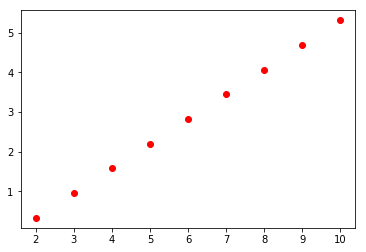

In [44]:
plt.plot(x,y, 'ro')